## Observations and Insights

## Dependencies and starter code

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
import matplotlib.pyplot as plt
from scipy.stats import linregress





# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_info = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_info


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_volume = pd.DataFrame(round(mouse_info.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'],2))
mean_volume = mean_volume.rename(columns={"Tumor Volume (mm3)":"Mean"})

median_volume = pd.DataFrame(round(mouse_info.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'],2))
median_volume = median_volume.rename(columns={"Tumor Volume (mm3)":"Median"})

variance = pd.DataFrame(round(mouse_info.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'],2))
variance = variance.rename(columns={"Tumor Volume (mm3)":"Variance"})

stdev = pd.DataFrame(round(mouse_info.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)'],2))
stdev = stdev.rename(columns={"Tumor Volume (mm3)":"StDev"})

SEM = pd.DataFrame(round(mouse_info.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)'],2))
SEM = SEM.rename(columns={"Tumor Volume (mm3)":"SEM"})

summary_stats = [mean_volume, median_volume, variance, stdev, SEM]
summary_stats = pd.concat(summary_stats,axis=1,join='inner')
summary_stats


,Mean,Median,Variance,StDev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar plots

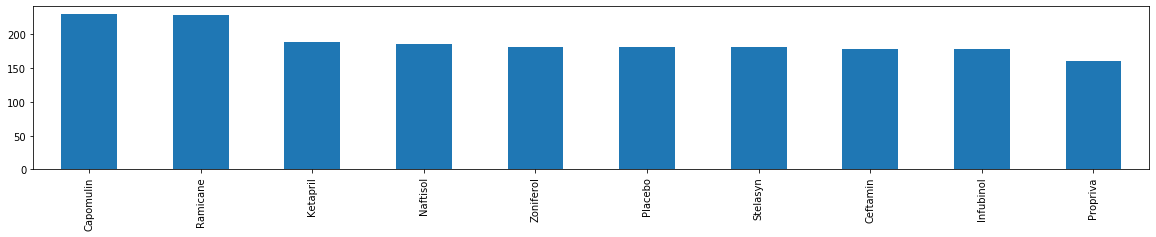

In [56]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points = mouse_info["Drug Regimen"].value_counts()
data_points_bar = data_points.plot(kind="bar", figsize=(20,3))
plt.show()






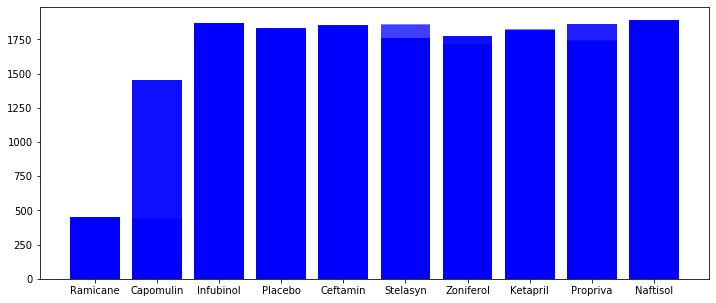

In [57]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_axis = np.arange(len(mouse_info))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(12,5))
plt.bar(mouse_info["Drug Regimen"], x_axis, color='b', alpha=0.5, align="center")
plt.show()


## Pie plots

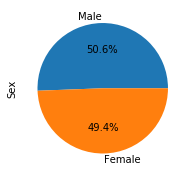

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = mouse_info["Sex"].value_counts()
gender.plot(kind="pie", figsize=(20,3), autopct="%1.1f%%")






([<matplotlib.patches.Wedge at 0x1a1bb956a0>,
 [Text(-0.6908564105755949, -0.8559891471079557, 'Male'),
  Text(0.690856410575595, 0.8559891471079556, 'Female')],
 [Text(-0.37683076940486987, -0.46690317114979396, '50.6%'),
  Text(0.3768307694048699, 0.46690317114979385, '49.4%')])

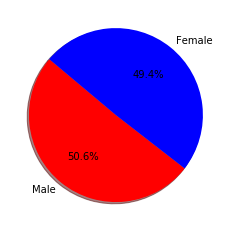

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = mouse_info["Sex"].value_counts()
colors = ["red", "blue"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


## Quartiles, outliers and boxplots

The lower quartile of temperatures is: 32.37735684
The upper quartile of temperatures is: 40.1592203
The interquartile range of temperatures is: 7.781863460000004
The the median of temperatures is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


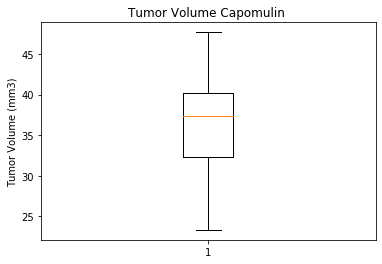

In [60]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#capomulin

most_promising = mouse_info.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
best_df = most_promising.loc[most_promising["Timepoint"] == 45]
best_df.head().reset_index()
cap_df = best_df[best_df['Drug Regimen'].isin(['Capomulin'])]
cap_df.head().reset_index()
cap_next = cap_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_next = cap_next["Tumor Volume (mm3)"]


quartiles = cap_next.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Capomulin ')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(cap_next)
plt.show()








The lower quartile of temperatures is: 30.981175224999998
The upper quartile of temperatures is: 38.508305307499995
The interquartile range of temperatures is: 7.527130082499998
The the median of temperatures is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


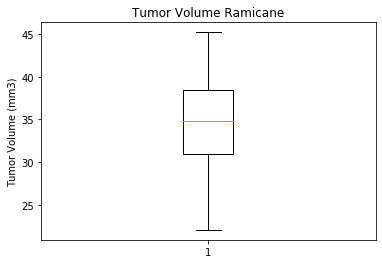

In [61]:
#Ramicane

ram_df = best_df[best_df['Drug Regimen'].isin(['Ramicane'])]
ram_df.head().reset_index()
ram_next = ram_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_next = ram_next["Tumor Volume (mm3)"]
quartiles = ram_next.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Ramicane')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(ram_next)
plt.show()

The lower quartile of temperatures is: 62.75445141
The upper quartile of temperatures is: 67.68556862
The interquartile range of temperatures is: 4.9311172099999965
The the median of temperatures is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


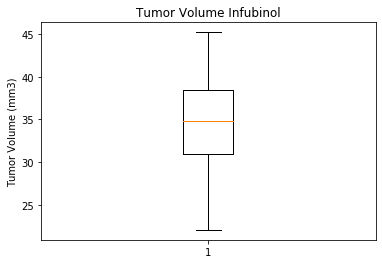

In [62]:
#Infubinol

inf_df = best_df[best_df['Drug Regimen'].isin(['Infubinol'])]
inf_df.head().reset_index()
inf_next = inf_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
inf_next = inf_next["Tumor Volume (mm3)"]
quartiles = inf_next.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Infubinol')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(ram_next)
plt.show()

The lower quartile of temperatures is: 61.43389223
The upper quartile of temperatures is: 67.52748237
The interquartile range of temperatures is: 6.093590140000003
The the median of temperatures is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


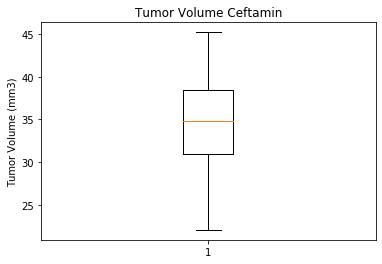

In [63]:
#Ceftamin

cef_df = best_df[best_df['Drug Regimen'].isin(['Ceftamin'])]
cef_df.head().reset_index()
cef_next = cef_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cef_next = cef_next["Tumor Volume (mm3)"]
quartiles = cef_next.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume Ceftamin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(ram_next)
plt.show()


## Line and scatter plots

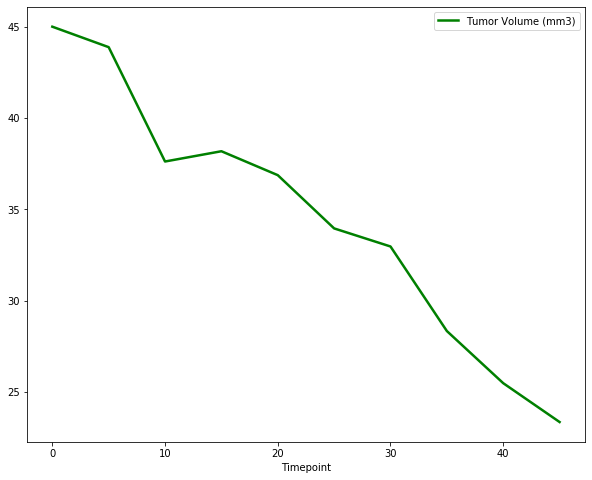

In [64]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = mouse_info.loc[mouse_info["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
cap_mouse_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
cap_mouse_df = cap_mouse_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
cap_mouse_df = cap_mouse_df.reset_index(drop=True)
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_mouse_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='green')


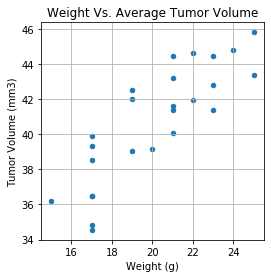

In [65]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_volume = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
avg_cap = pd.DataFrame(weight_volume.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_cap = avg_cap.set_index('Mouse ID')
avg_cap.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")
plt.show()


In [66]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

In [67]:
weight = avg_cap.iloc[:,0]
avg_volume = avg_cap.iloc[:,1]
correlation = st.pearsonr(weight,avg_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


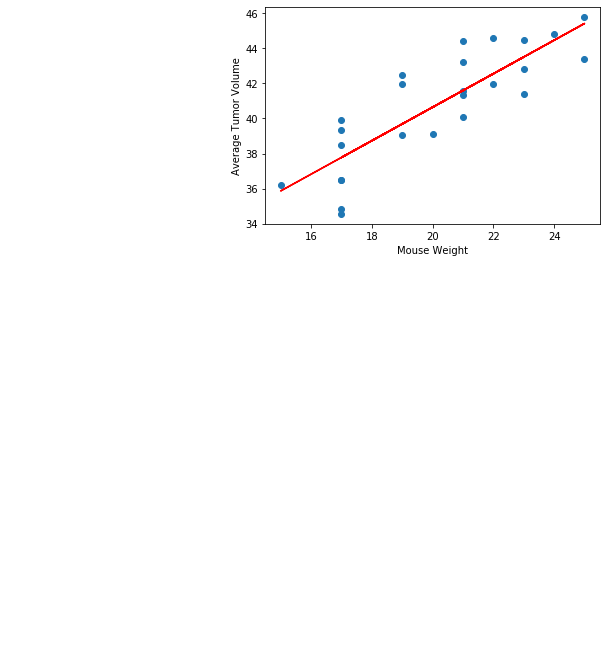

In [68]:
x_values = avg_cap['Weight (g)']
y_values = avg_cap['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()